# 数据集分析

## 初始化

In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [11]:
def get_data(filename="../data/train/train.csv"):
    """
    获取训练或测试数据集
    :param filename: 数据位置
    :return: <pandas.DataFrame> 返回一个pandas表
    """
    data = pd.read_csv(filename)
    return data

In [18]:
def freq_stat(list):
    """
    词频统计
    """
    freq_dict = {}
    for word in list:
        if freq_dict.get(word):
            freq_dict[word] += 1
        else:
            freq_dict[word] = 1
    return freq_dict

In [31]:
def bar(data):
    data_sorted = sorted(data.items(), key=lambda x:x[1], reverse=True)
    values = [x[1] for x in data_sorted]
    labels = [x[0] for x in data_sorted]
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.bar(range(len(values)), values, tick_label=labels)
    plt.show()

In [47]:
def get_percentage(data):
    summa = np.sum(list(data.values()))
    re = {}
    for key in data.keys():
        re[key] = np.divide(data[key], summa)
#         print(key, data[key], summa)
    return re

In [3]:
train_data = get_data("../data/train/train.csv")
test_data = get_data("../data/test_public/test_public.csv")

In [4]:
train_data.head()

,content_id,content,subject,sentiment_value,sentiment_word
0,vUXizsqexyZVRdFH,因为森林人即将换代，这套系统没必要装在一款即将换代的车型上，因为肯定会影响价格。,价格,0,影响
1,4QroPd9hNfnCHVt7,四驱价格貌似挺高的，高的可以看齐XC60了，看实车前脸有点违和感。不过大众的车应该不会差。,价格,-1,高
2,QmqJ2AvM5GplaRyz,斯柯达要说质量，似乎比大众要好一点，价格也低一些，用料完全一样。我听说过野帝，但没听说过你说...,价格,1,低
3,KMT1gFJiU4NWrVDn,这玩意都是给有钱任性又不懂车的土豪用的，这价格换一次我妹夫EP020可以换三锅了,价格,-1,有钱任性
4,nVIlGd5yMmc37t1o,17价格忒高，估计也就是14-15左右。,价格,-1,高


In [5]:
test_data.head()

,content_id,content
0,XuPwKCnA2fqNh5vm,欧蓝德，价格便宜，森林人太贵啦！
1,2jNbDn85goX3IuPE,楼主什么时候提的车，南昌优惠多少啊
2,hLgEADQ8sUnvGFK9,吉林，2.5优惠20000，送三年九次保养，贴膜
3,nZmM7LQsfr03wUaz,便宜2万的豪华特装，实用配制提升，优惠还给力，确实划算。
4,pwd8MnrthDqLZafe,如果实在想买就等车展期间，优惠2万，我24.98万入的2.5豪


## 概览

In [54]:
print("训练集行数：", train_data.index[-1]+1)
print("测试集行数：", test_data.index[-1]+1)

训练集行数： 9947
测试集行数： 2364


In [58]:
"""训练集id部分有无空值"""
train_data.loc[train_data["content_id"] == ""]

,content_id,content,subject,sentiment_value,sentiment_word


In [57]:
"""训练集内容部分有无空值"""
train_data.loc[train_data["content"] == ""]

,content_id,content,subject,sentiment_value,sentiment_word


In [61]:
"""训练集情感分析部分有无空值"""
train_data.loc[train_data["sentiment_value"] == np.NaN]

,content_id,content,subject,sentiment_value,sentiment_word


In [63]:
"""测试集content_id部分有无空值"""
test_data.loc[test_data["content_id"] == ""]

,content_id,content


In [64]:
"""测试集content部分有无空值"""
test_data.loc[test_data["content"] == ""]

,content_id,content


## 训练集分析

### 主题分析（subject）

In [9]:
subject_set = set(train_data["subject"])
print("主题共有 {} 种，分别是 {}".format(len(subject_set), subject_set))

主题共有 10 种，分别是 {'操控', '油耗', '价格', '动力', '外观', '内饰', '配置', '空间', '舒适性', '安全性'}


In [16]:
freq_subject = freq_stat(train_data["subject"])

In [17]:
freq_subject

{'价格': 1273,
 '内饰': 536,
 '动力': 2732,
 '外观': 489,
 '安全性': 573,
 '操控': 1036,
 '油耗': 1082,
 '空间': 442,
 '舒适性': 931,
 '配置': 853}

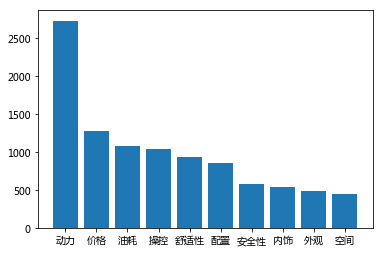

In [35]:
bar(freq_subject)

{'价格': 0.12797828491002311, '配置': 0.085754498843872526, '操控': 0.10415200562983815, '舒适性': 0.093596059113300489, '油耗': 0.1087765155323213, '动力': 0.27465567507791294, '内饰': 0.053885593646325523, '安全性': 0.057605308133105458, '空间': 0.044435508193425156, '外观': 0.04916055091987534}


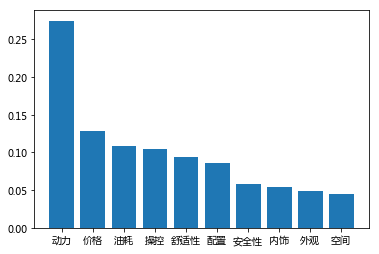

In [50]:
freq_percentage = get_percentage(freq_subject)
print(freq_percentage)
bar(freq_percentage)

### 情感极性分析（sentiment_value）

In [65]:
senti_set = set(train_data["sentiment_value"])
print("主题共有 {} 种，分别是 {}".format(len(senti_set), senti_set))

主题共有 3 种，分别是 {0, 1, -1}


In [66]:
freq_senti = freq_stat(train_data["sentiment_value"])

In [67]:
freq_senti

{-1: 1616, 0: 6661, 1: 1670}

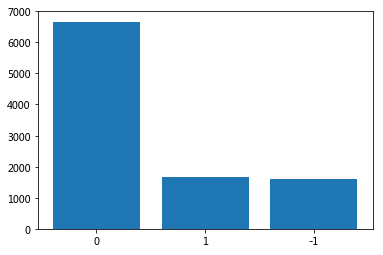

In [68]:
bar(freq_senti)

{0: 0.66964914044435508, -1: 0.16246104353071278, 1: 0.16788981602493214}


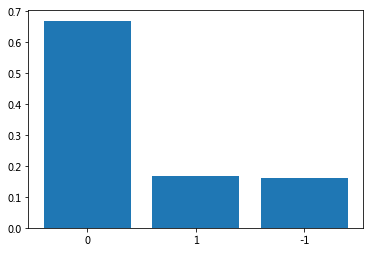

In [69]:
senti_percentage = get_percentage(freq_senti)
print(senti_percentage)
bar(senti_percentage)